## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

#balancing the target variable
from imblearn.over_sampling import RandomOverSampler

from collections import Counter



## Import Data

In [4]:
data = pd.read_csv('waterQuality1.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
data.shape

(7999, 21)

In [6]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
# drop missing values
data['ammonia'].value_counts()['#NUM!']
data = data[data['ammonia'].str.contains('#NUM!') == False]

In [9]:
# convert both columns to numeric data
data['ammonia'] = pd.to_numeric(data['ammonia'])
data['is_safe'] = pd.to_numeric(data['is_safe'])

In [10]:
#statistic metrics for continuous variables without scientific notation
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


## Data Visualization

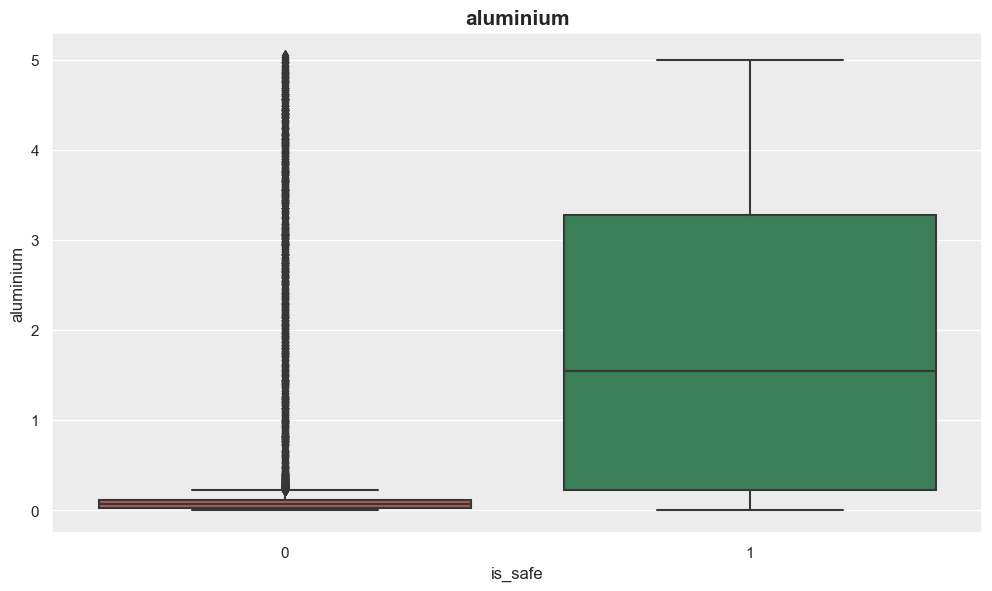

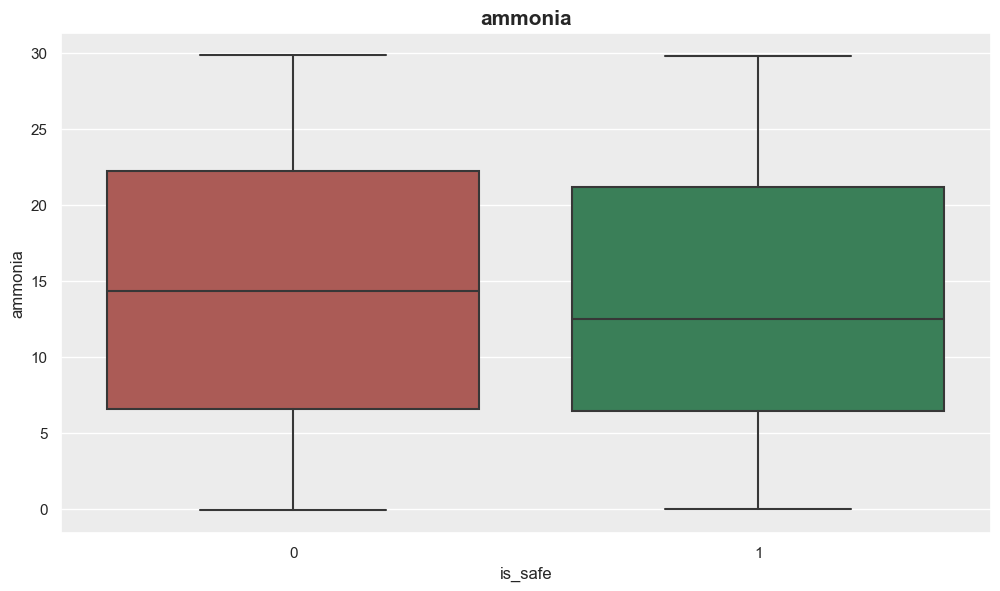

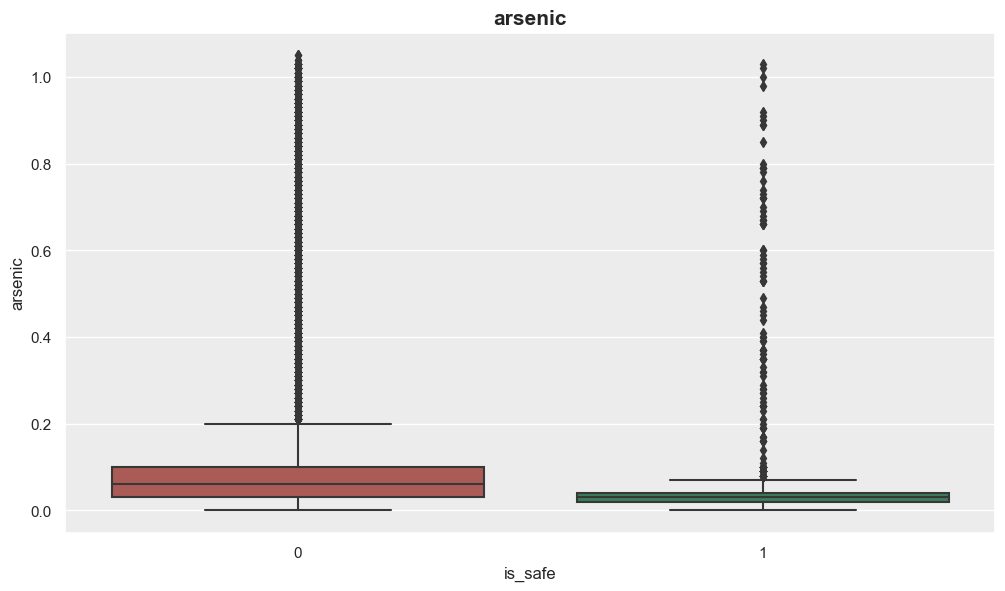

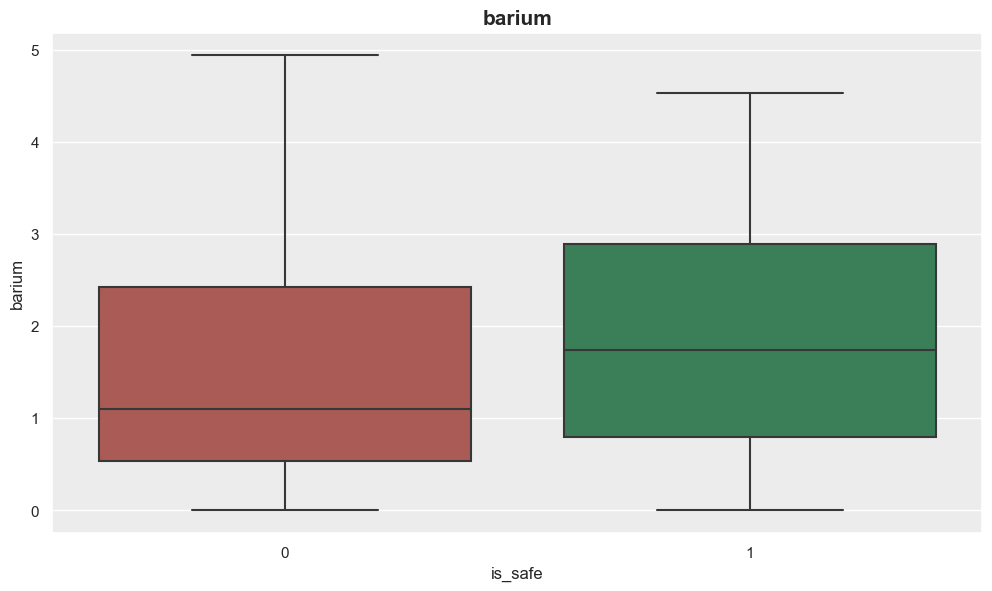

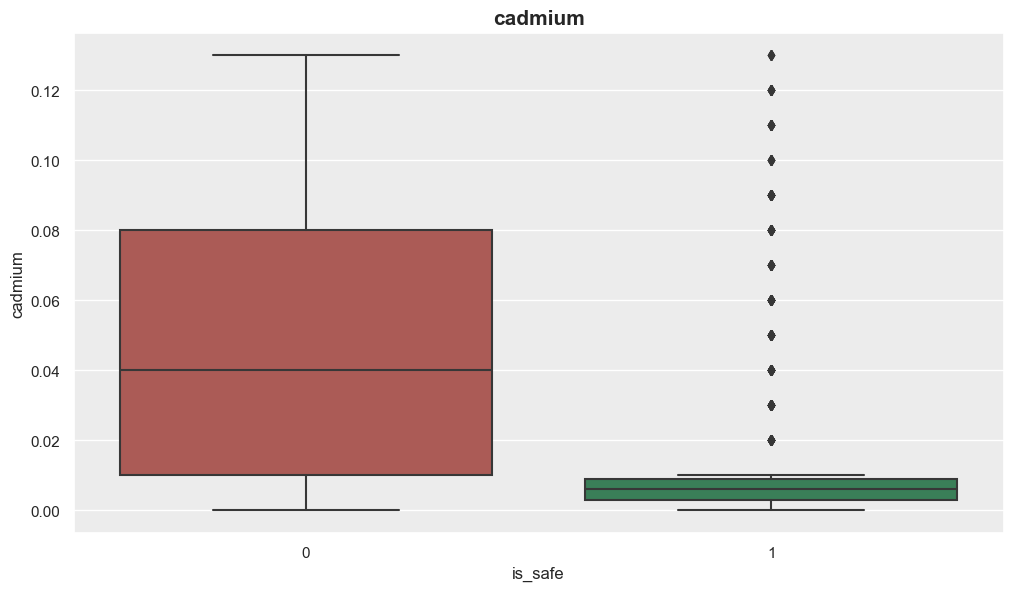

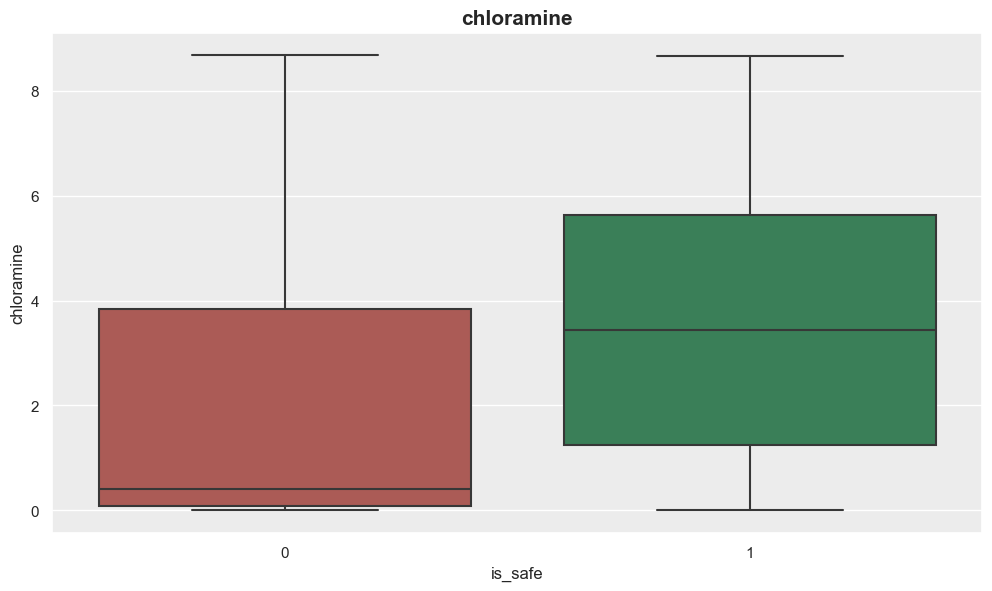

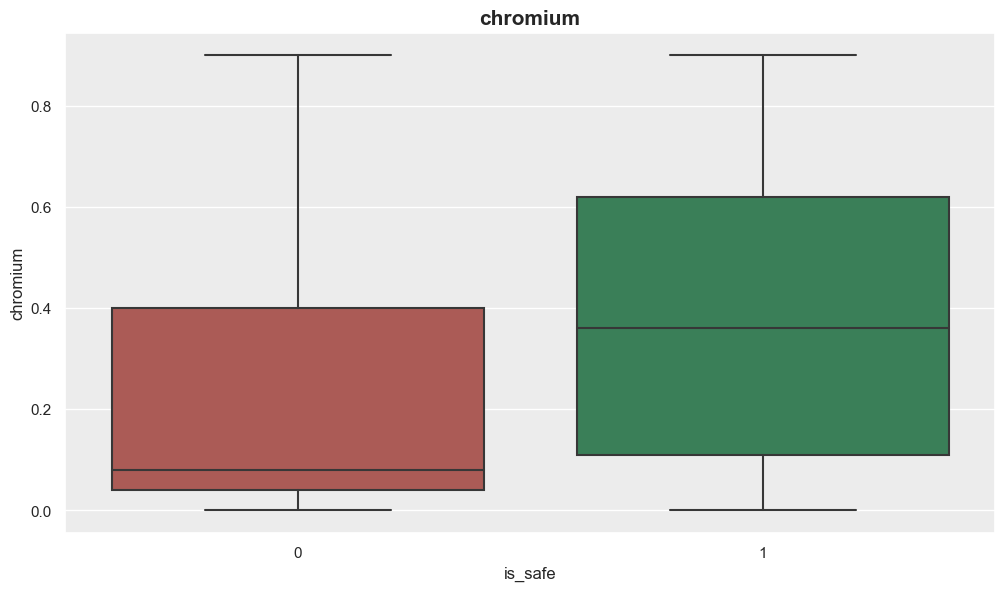

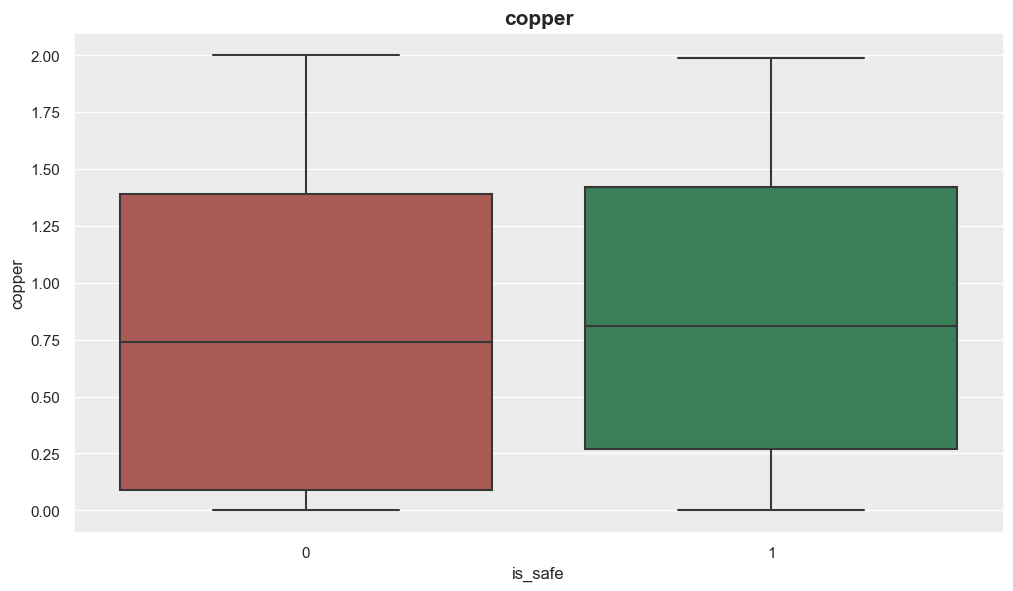

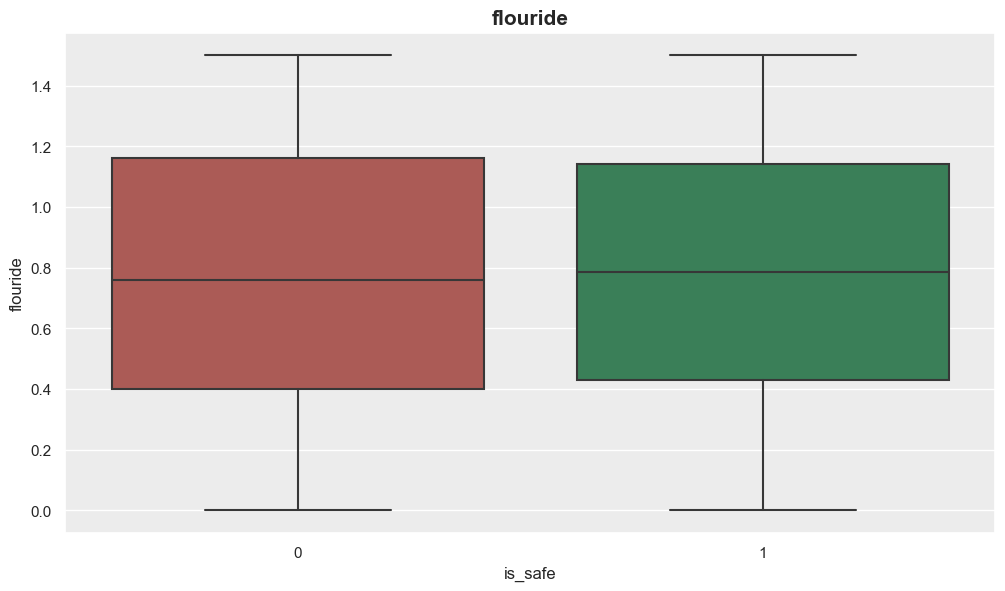

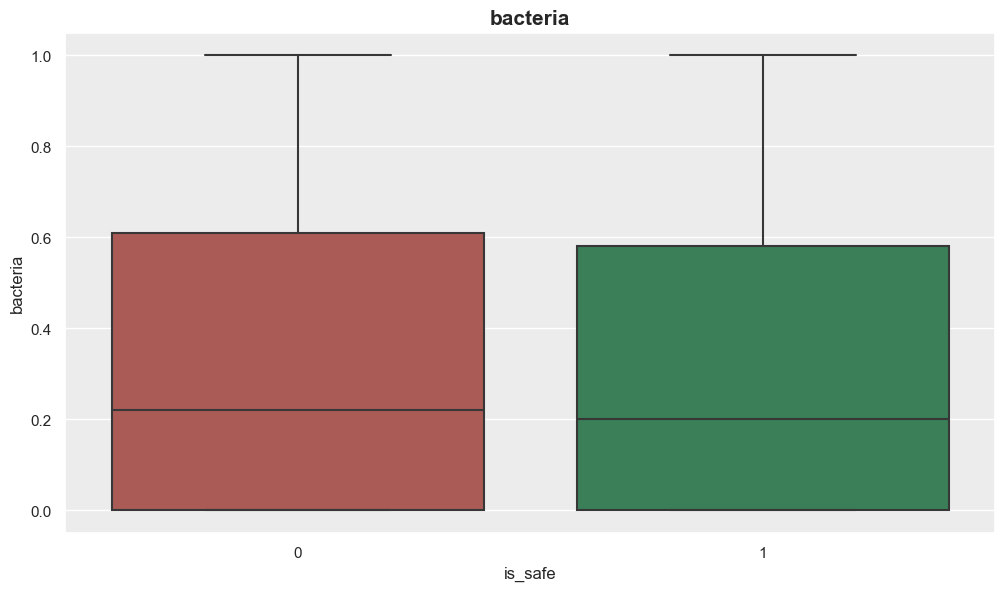

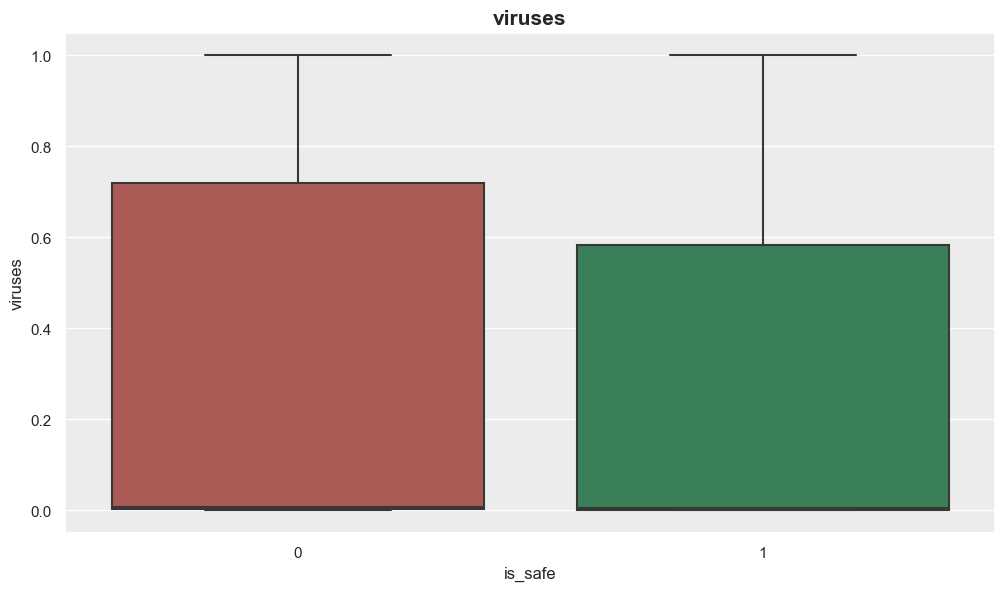

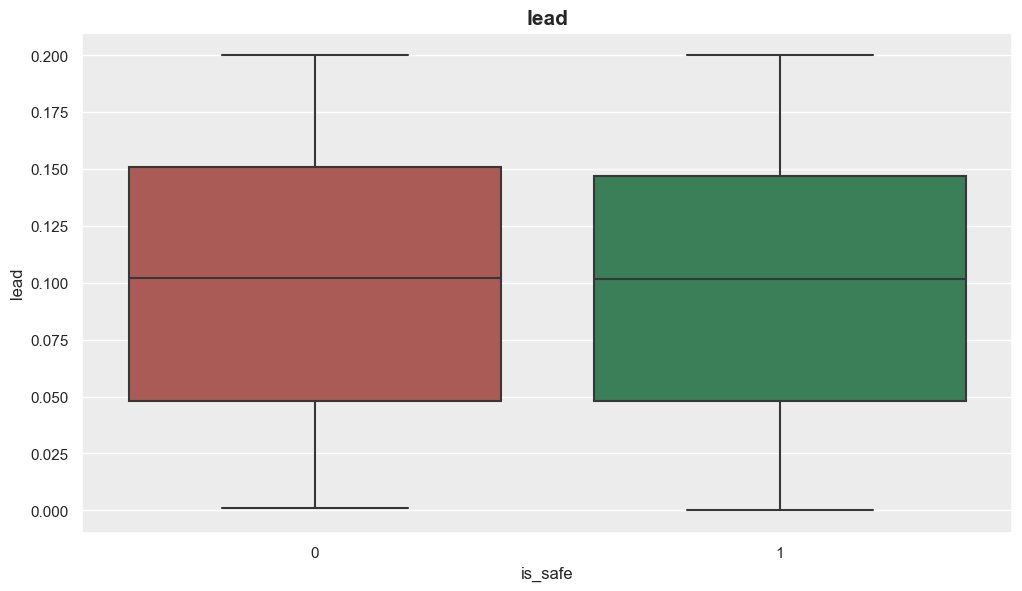

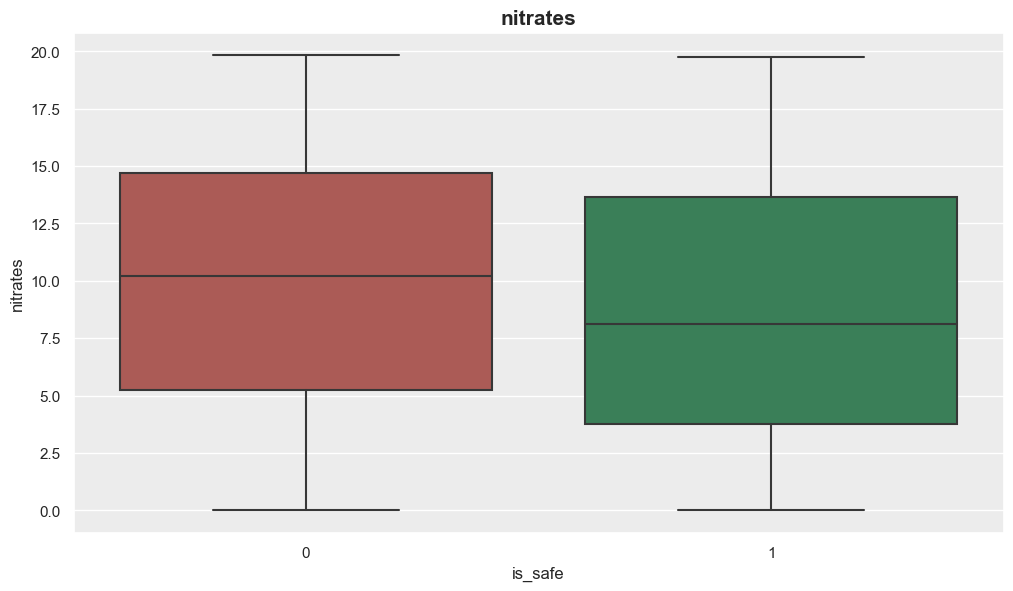

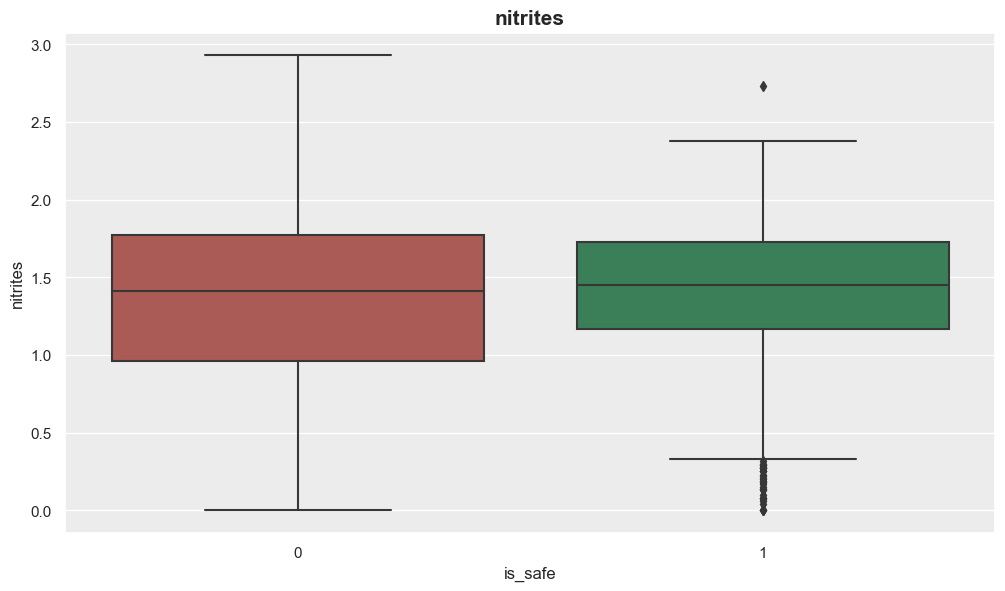

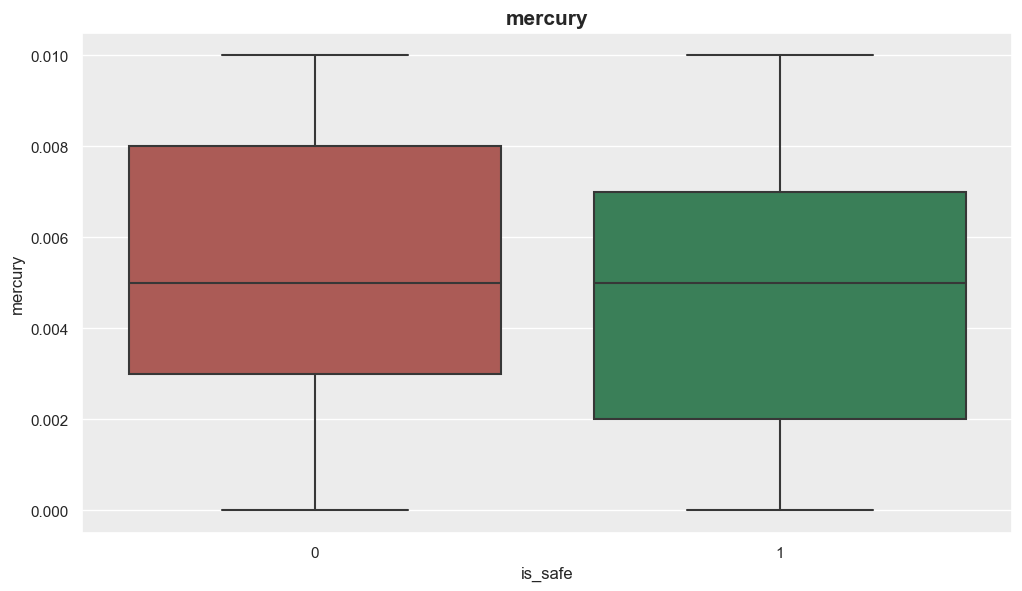

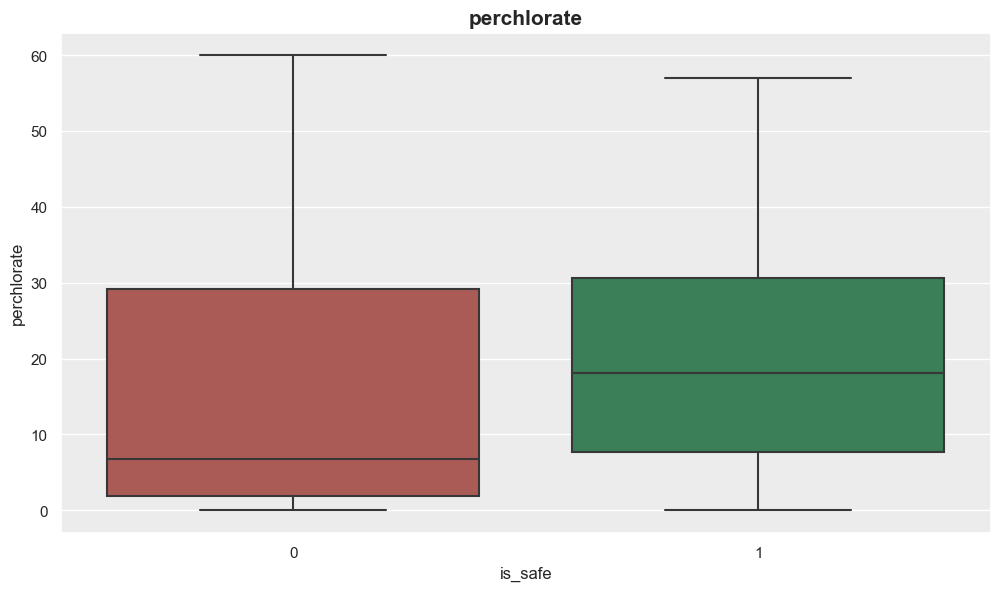

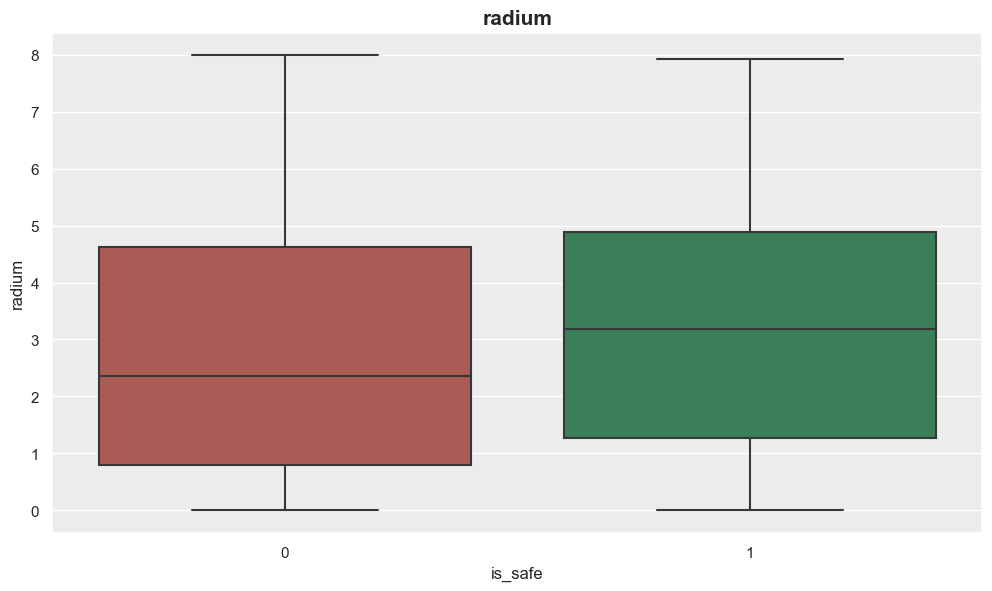

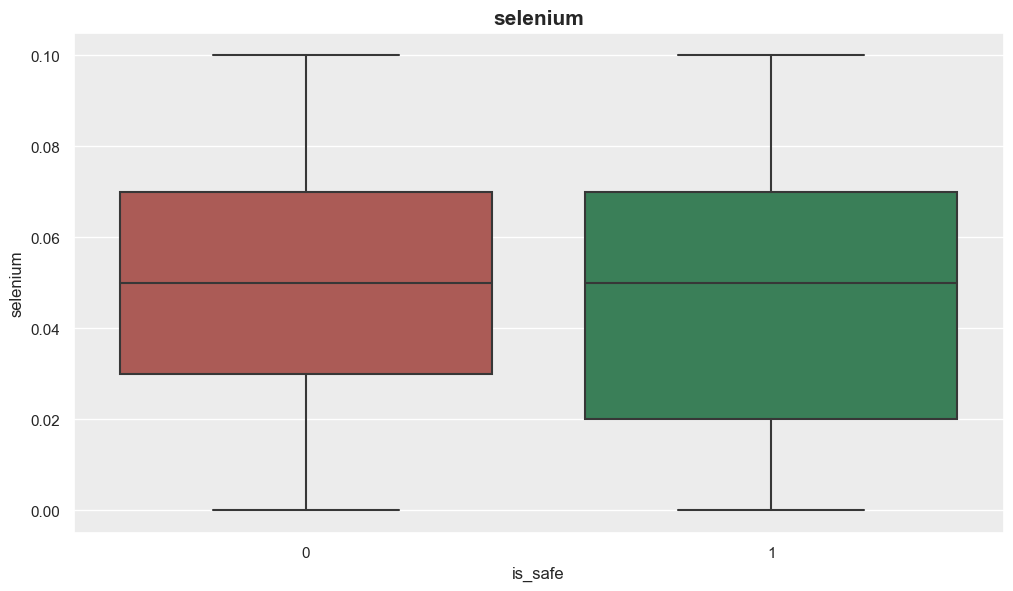

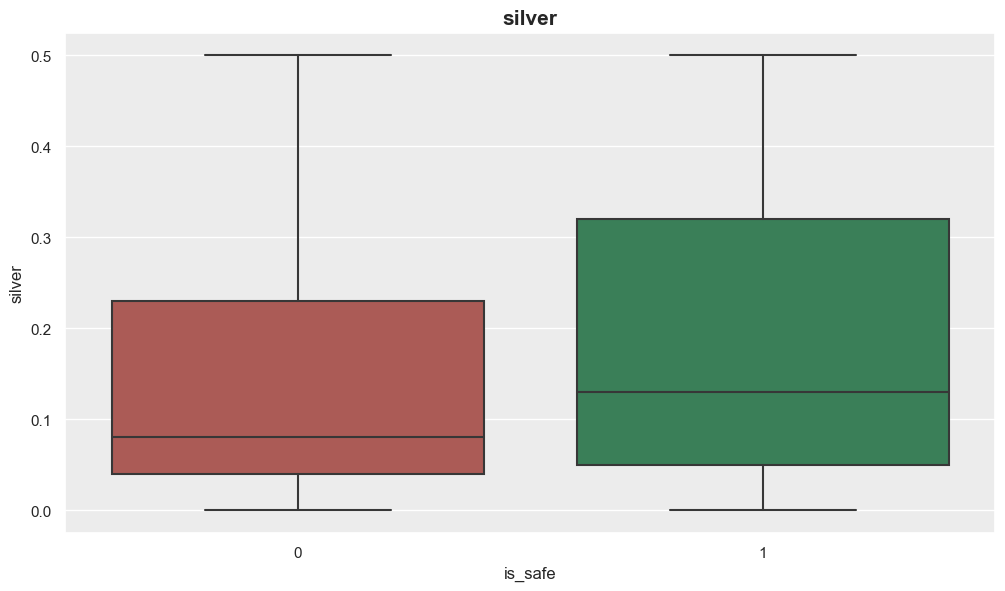

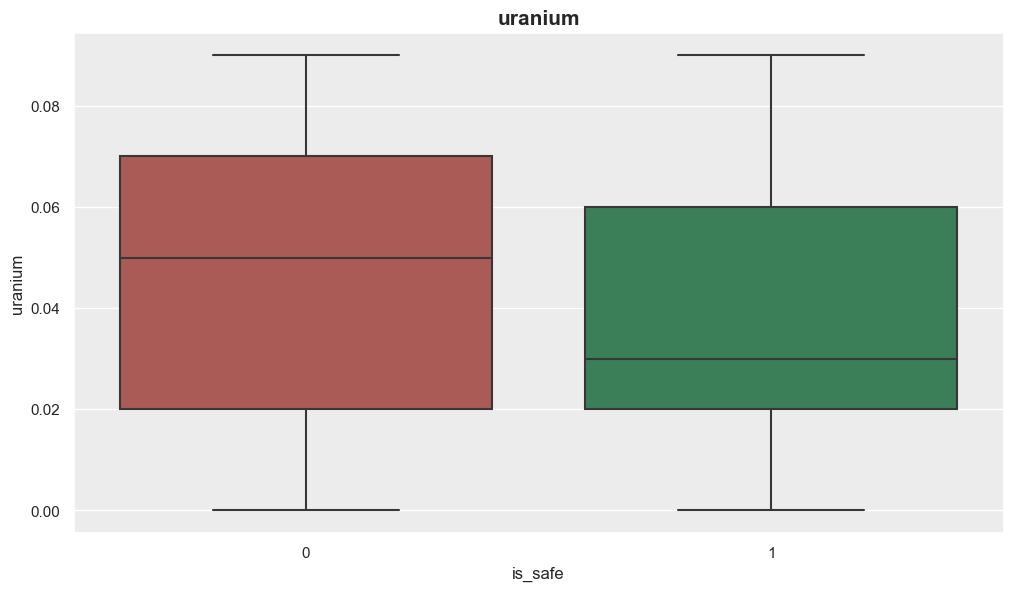

In [12]:
#list of numerical features
list_of_num_features = data.loc[:, data.columns != 'is_safe']
palette_features = ['#b94e48', '#2e8b57']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.boxplot(x = data['is_safe'], y = list_of_num_features[feature], data = data, palette=palette_features)
    # labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

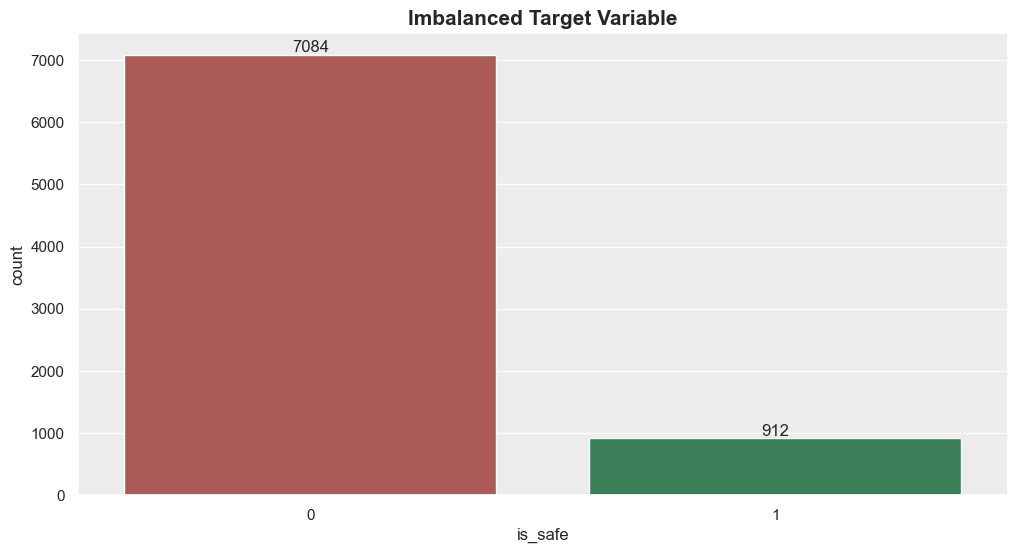

In [13]:
#plot target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced Target Variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=data['is_safe'], data=data, palette=palette_features)

# labels to each bar
abs_values = data['is_safe'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

plt.show()

## Imbalanced Target Variable

Imbalanced target variable would cause the models to bias toward one class over another. In this case, the models would biased class 0 over 1. To deal with it, oversampling strategy will be implemented using the RandomOverSampler class. Same numbers of rows for value 1 of target variable is_safe will be generated in order to get the same number of rows for both values of target variable.

In [14]:
#balance the target variable
columns = data.columns
columns = [i for i in columns if i not in ['is_safe']]
y = data['is_safe'] #target variable
X = data[columns]  #features

ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y)}\n")
print(X.shape[0] - data.shape[0], 'new random picked points')

Imbalanced target class: 0        1
1        1
2        0
3        1
4        1
        ..
14163    1
14164    1
14165    1
14166    1
14167    1
Name: is_safe, Length: 14168, dtype: int64

Balanced target class: Counter({1: 7084, 0: 7084})

6172 new random picked points


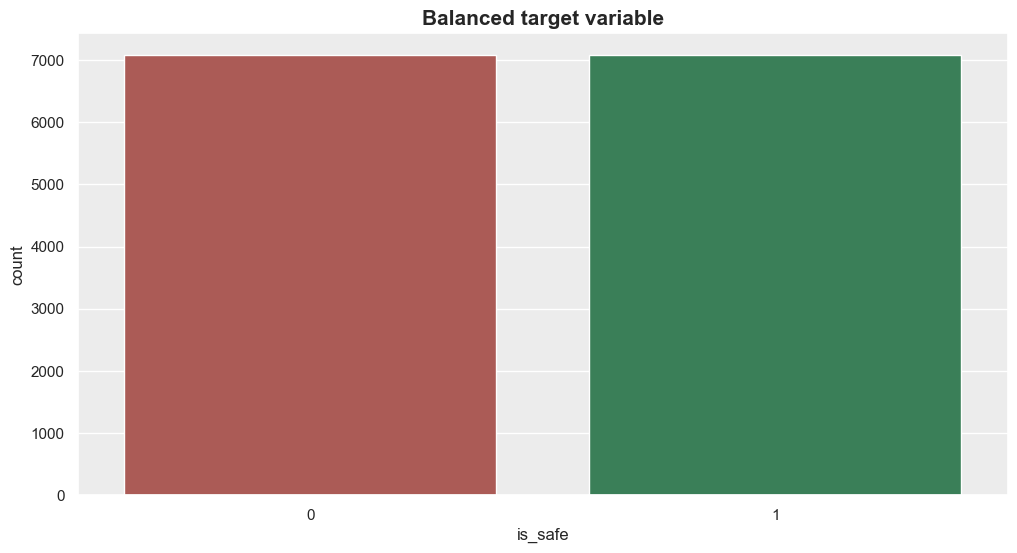

In [15]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y, data=data, palette=palette_features)
plt.show()

Target variable has been balanced and ready to be processed

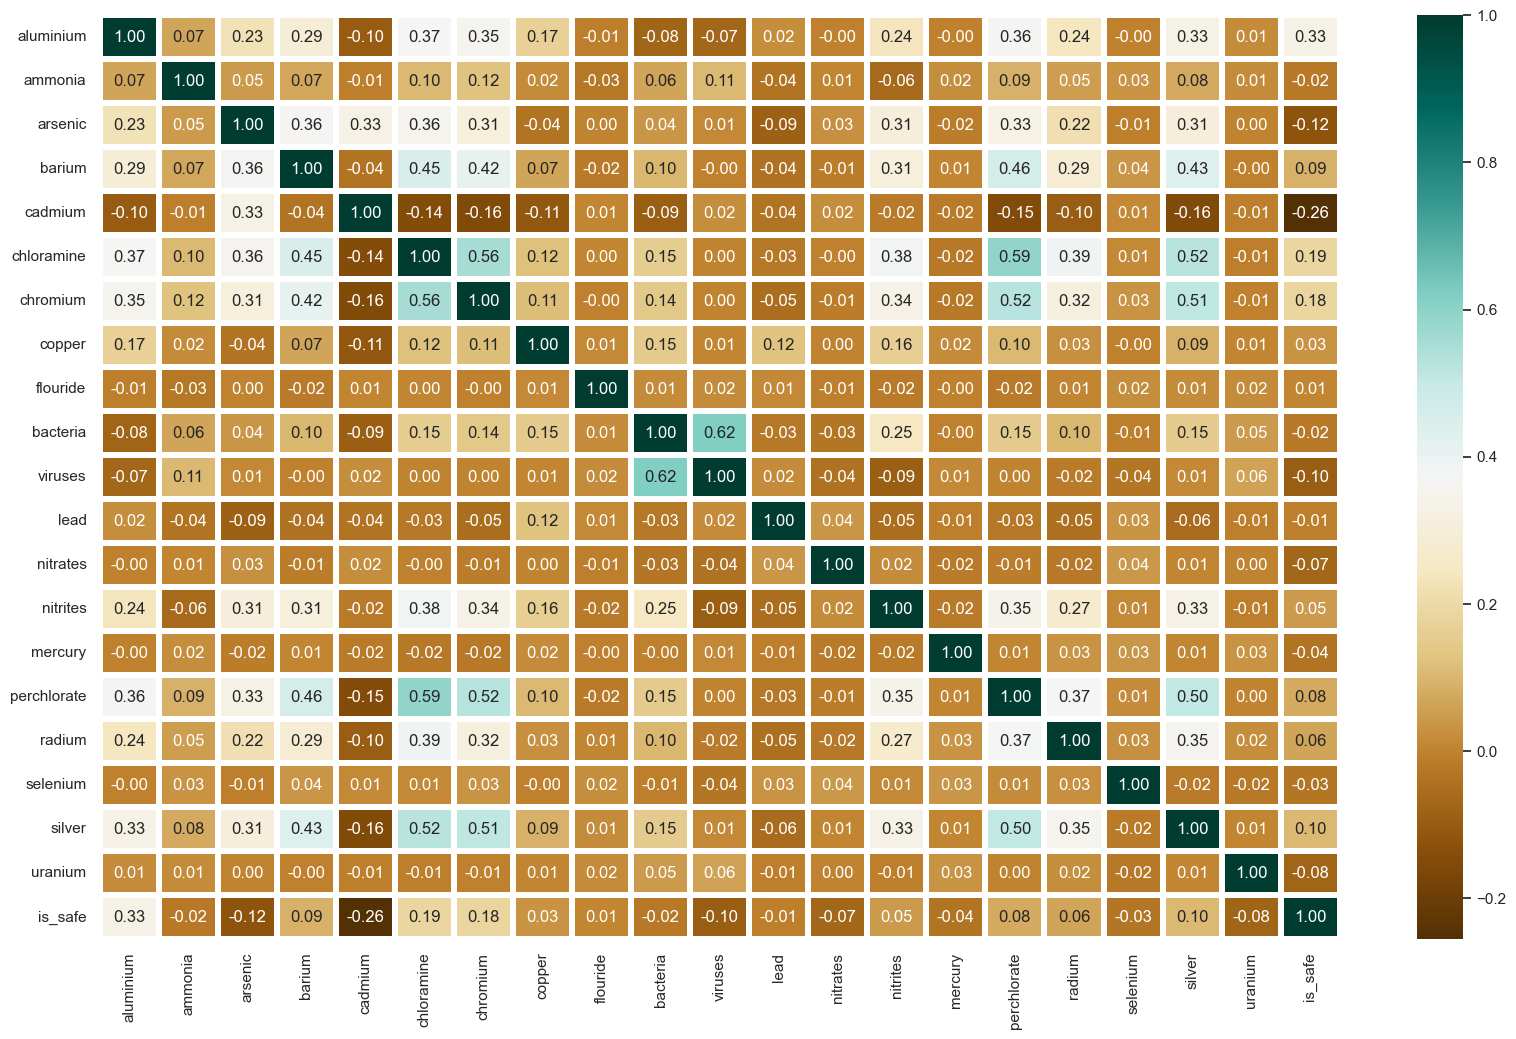

In [16]:
# plotting correlation matrix
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## Data Preparation

Preparing dataset before the training process. Dataset will be split for training and testing.
- X: features
- y: target variable

20% of the dataset will be located as test data, while the remaining portion (80%) will be used as train data. random_state variable is set as 0 at the first place.

In [17]:
random = [1, 12, 123, 1234, 12345]

target_class = data['is_safe'].unique().tolist()
target_class



# #preparation of train and test data for K-NN
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #80 % of train data, 20 % of test data
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

[1, 0]

In [18]:
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,0.26,12.48,0.04,3.67,0.005,3.01,0.65,1.41,0.51,0.00,0.000,0.187,1.07,1.20,0.010,23.72,7.71,0.08,0.32,0.00
14164,0.08,23.49,0.10,1.19,0.060,0.35,0.05,0.02,0.63,0.00,0.007,0.112,9.87,0.71,0.001,0.42,1.58,0.03,0.03,0.05
14165,0.09,23.77,0.06,0.12,0.060,0.06,0.02,1.09,0.97,0.00,0.003,0.051,4.08,0.60,0.006,0.07,4.16,0.04,0.01,0.08
14166,4.76,20.60,0.02,1.71,0.005,6.26,0.58,0.11,1.22,0.00,0.000,0.176,3.77,1.84,0.006,10.24,0.82,0.01,0.47,0.08


In [19]:
y

0        1
1        1
2        0
3        1
4        1
        ..
14163    1
14164    1
14165    1
14166    1
14167    1
Name: is_safe, Length: 14168, dtype: int64

## K-NN Classification

The first step is to figure out the value of n_neighbors to get the best accuracy score of the experiment.

In [17]:
print('Neighbors\t Accuracy Score')
for i in range (2, 11):
    knn_score = []
    for j in range (5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= random[j])
        knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        knn_predict = knn.predict(X_test)
        knn_score.append(accuracy_score(y_test, knn_predict))
    print('{}\t\t {:.5f}' .format(i, np.mean(knn_score)))

Neighbors	 Accuracy Score
2		 0.94121
3		 0.90430
4		 0.89901
5		 0.87163
6		 0.86528
7		 0.84707
8		 0.83754
9		 0.82279
10		 0.81567


K value that is best for the experiment is 2 neighbors. The next step is to figure out the ideal random_state variable.

In [18]:
print("Random state\t Accuracy Score")

for i in range (5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= random[i])
    knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    print('{}\t\t {:.5f}' .format(random[i], accuracy_score(y_test, knn_predict)))

Random state	 Accuracy Score
1		 0.93543
12		 0.94354
123		 0.94354
1234		 0.93825
12345		 0.94531


The ideal value of random_state variable is 12345.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12345)
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
knn_predict = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_predict)
cm

array([[1260,  148],
       [   7, 1419]], dtype=int64)

Text(0.5, 1.0, 'K-NN Confusion Matrix')

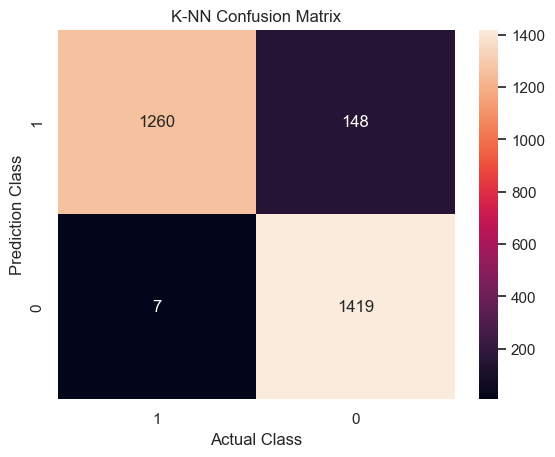

In [20]:
target_class = y_test.unique().tolist()
target_class

sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels=target_class,
            yticklabels=target_class)
plt.ylabel('Prediction Class')
plt.xlabel('Actual Class')
plt.title('K-NN Confusion Matrix')

In [21]:
#evaluation
print(classification_report(y_test, knn_predict))

print('Accuracy Score : '  + str((round(accuracy_score(y_test,knn_predict),5)*100)) + '%')
print('Precision Score : ' + str((round(precision_score(y_test,knn_predict),5)*100)) + '%')

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1408
           1       0.91      1.00      0.95      1426

    accuracy                           0.95      2834
   macro avg       0.95      0.94      0.95      2834
weighted avg       0.95      0.95      0.95      2834

Accuracy Score : 94.53099999999999%
Precision Score : 90.55499999999999%


## ANN Classification

Similar to the initial step int he K-NN classification, while the K-NN process need to figure out the value of n_neighbors, ANN classification need to figure out the best value of maximum Iteration (maxIter)

In [20]:
maxIter = [100, 200, 300, 400, 500]

print('Max Iter\t Accuracy Score')
for i in range (5):
    accuracy = []
    for j in range (5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= random[j])
        ann = MLPClassifier(random_state=1, max_iter=maxIter[i]).fit(X_train, y_train.values.ravel())
        y_pred = ann.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    print('max iter: {}, accuracy: {:.5f}' .format(maxIter[i], np.mean(accuracy)))


Max Iter	 Accuracy Score


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the 

max iter: 100, accuracy: 0.91877


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

max iter: 200, accuracy: 0.93987


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the 

max iter: 300, accuracy: 0.95053


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the 

max iter: 400, accuracy: 0.95476
max iter: 500, accuracy: 0.95787


Best maxIter value is 500

In [21]:
print('Random State\t Accuracy')
for i in range (5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= random[i])
    ann = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train.values.ravel())
    y_pred = ann.predict(X_test)
    print('{}\t\t {:.5f}' .format(random[i], accuracy_score(y_test, y_pred)))

Random State	 Accuracy
1		 0.94472
12		 0.95178
123		 0.95225
1234		 0.95107
12345		 0.94143


It is obtained that 1 is the ideal value for random_state variable.

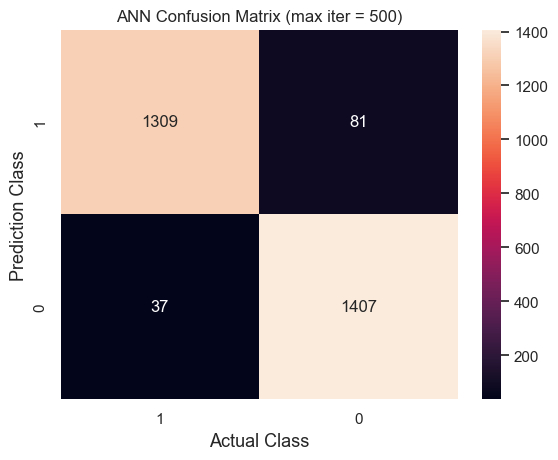

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
ann = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = ann.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_class, yticklabels= target_class)
plt.ylabel('Prediction Class', fontsize=13)
plt.xlabel('Actual Class', fontsize = 13)
plt.title('ANN Confusion Matrix (max iter = 500)')
plt.show()

In [23]:
print('ANN Clasification Report:\n\n{}' .format(classification_report(y_test, y_pred)))

print('Accuracy Score : '  + str((round(accuracy_score(y_test,y_pred),5)*100)) + '%')
print('Precision Score : ' + str((round(precision_score(y_test,y_pred),5)*100)) + '%')

ANN Clasification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1390
           1       0.95      0.97      0.96      1444

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834

Accuracy Score : 95.836%
Precision Score : 94.556%


## Conclusion

In this experiment, K-NN classification obtains accuracy of 94.46% and ANN classification obatins accuracy of 94.742%. Consequently, it can be inferred that ANN classification is more suitable to be applied for the given dataset.